In [1]:
from classifier_inference import *

Using cpu device


In [2]:
#inferencing: We first load the test data and conver them in NP Array
from classifier_inference import *
cats_test = load_images('/home/cdsw/archive_small/test_set/cats')
dogs_test = load_images('/home/cdsw/archive_small/test_set/dogs')
X_test  = np.append(cats_test, dogs_test, axis=0)
y_test = np.array([0] * len(cats_test) + [1] * len(dogs_test))

X_test_min = X_test[0:32]
y_test_min = y_test[0:32]
# X_test_min = X_test
# y_test_min = y_test

print(X_test_min.shape, y_test_min.shape)
model_input = {"X_test": X_test_min.tolist(), "y_test": y_test_min.tolist(), "batch_size": 32}

100%|██████████████████████████████████████████| 51/51 [00:00<00:00, 123.89it/s]


(32, 100, 100, 3) (32,)


In [3]:
import os
import json
import string
import cmlapi
from src.api import ApiUtility
import cdsw

# Here we are calling the Deployed Model 

model_name =  os.getenv("REGISTERED_MODEL_NAME") or "classify_cats_and_dogs"
client = cmlapi.default_client()
project_id = os.environ["CDSW_PROJECT_ID"]


# You can use an APIV2-based utility to access the models access key
apiUtil = ApiUtility()
Model_AccessKey = apiUtil.get_latest_deployment_details(model_name=model_name)["model_access_key"]
print(f"The Model Access Key is : {Model_AccessKey}")

#Finally we call the model. The Response attribute gives us the churn prediction for each input customer. 
model_response = cdsw.call_model(model_access_key=Model_AccessKey,ipt=model_input)
print(model_response)

The Model Access Key is : mb40q7cpga8x1l7gfba57tq92o873qoz
{'success': True, 'response': {'result': [[1], [1], [1], [1], [0], [0], [0], [1], [1], [0], [0], [1], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [1], [0]]}, 'ReplicaID': 'classify-cats-and-dogs-1039-1833-677bcf69cc-4h6gr', 'Size': 168, 'StatusCode': 200}


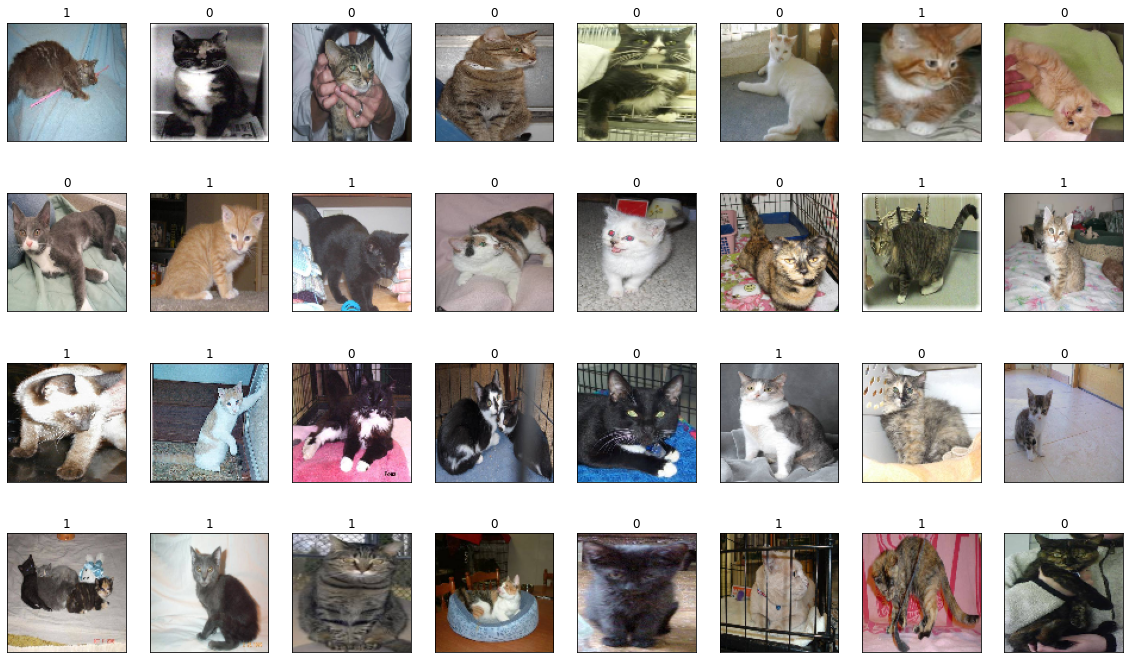

In [4]:
#Show the Prediction as Images
y_pred_min = np.array(model_response["response"]["result"])
#print(y_pred_min)
show_images(X_test_min, y_pred_min,0)